# <font color='blue'>Data Science Academy - Machine Learning</font>

# <font color='blue'>Capítulo 8 - K-Means</font>

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score
from sklearn.metrics import homogeneity_completeness_v_measure
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Exemplos

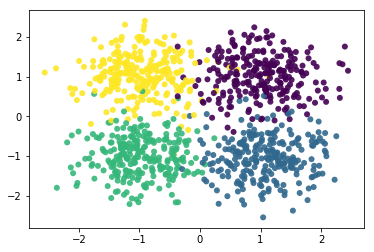

In [2]:
# Sample Generator
from sklearn.datasets.samples_generator import make_blobs
centers = [[1, 1], [1, -1], [-1, -1], [-1, 1]]
X, y = make_blobs(n_samples = 1000, centers = centers, cluster_std = 0.5, random_state = 101)
plt.scatter(X[:,0], X[:,1], c = y, edgecolors = 'none', alpha = 0.9)
plt.show()

In [3]:
X

array([[-0.56097745, -0.57894625],
       [ 1.43208244,  0.21953428],
       [ 0.80442169,  1.51414658],
       ...,
       [-0.78248729, -1.35797265],
       [-1.48165989,  1.11282138],
       [-1.3939633 ,  0.91188617]])

In [10]:
y[:10]

array([2, 0, 0, 0, 1, 1, 2, 1, 2, 3])

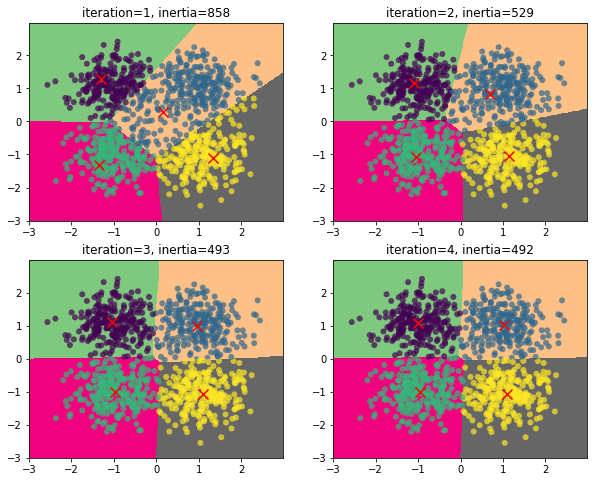

In [3]:
# Plot dos Clusters nas Células de Voronoi
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

for n_iter in range(1, 5):

    cls = KMeans(n_clusters = 4, max_iter = n_iter, n_init = 1, init = 'random', random_state = 101)
    cls.fit(X)
    
    # Plot
    plt.subplot(2, 2, n_iter)
    h = 0.02
    xx, yy = np.meshgrid(np.arange(-3, 3, h), np.arange(-3, 3, h))
    Z = cls.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.imshow(Z, 
               interpolation = 'nearest', 
               cmap=plt.cm.Accent,
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               aspect = 'auto', 
               origin = 'lower')

    # Inertia = Soma das distâncias das amostras para o seu centro de agrupamento mais próximo.
    # Iteration = Número de iterações definido pelo parâmero n_iter definido acima
    plt.scatter(X[:,0], X[:,1], c = cls.labels_, edgecolors = 'none', alpha = 0.7)
    plt.scatter(cls.cluster_centers_[:,0], cls.cluster_centers_[:,1], marker = 'x', color = 'r', s = 100, linewidths = 4)
    plt.title("iteration=%s, inertia=%s" %(n_iter, int(cls.inertia_)))

plt.show()

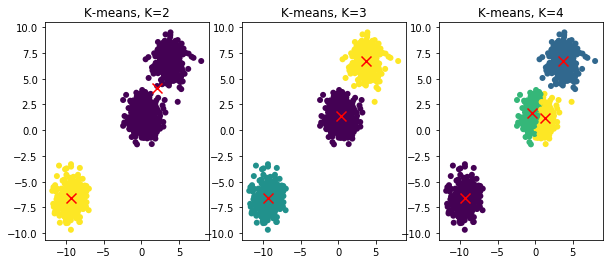

In [4]:
# Diferenças nos clusters de acordo com os valores de K
pylab.rcParams['figure.figsize'] = (10.0, 4.0)
X, _ = make_blobs(n_samples = 1000, centers = 3, random_state = 101)

for K in [2, 3, 4]:
    cls = KMeans(n_clusters = K, random_state = 101)
    y_pred = cls.fit_predict(X)
    
    plt.subplot(1, 3, K-1)
    plt.title("K-means, K=%s" % K)
    plt.scatter(X[:, 0], X[:, 1], c = y_pred, edgecolors = 'none')
    plt.scatter(cls.cluster_centers_[:,0], cls.cluster_centers_[:,1], marker = 'x', color = 'r', s = 100, linewidths = 4)

plt.show()

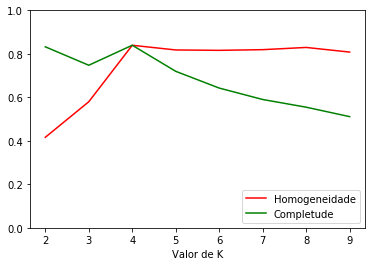

In [5]:
# Checando a homogeneidade dentro do cluster
pylab.rcParams['figure.figsize'] = (6.0, 4.0)


centers = [[1, 1], [1, -1], [-1, -1], [-1, 1]]
X, y = make_blobs(n_samples = 1000, centers = centers, cluster_std = 0.5, random_state = 101)

Ks = range(2, 10)
HCVs = []
for K in Ks:
    y_pred = KMeans(n_clusters = K, random_state = 101).fit_predict(X)
    HCVs.append(homogeneity_completeness_v_measure(y, y_pred))

plt.plot(Ks, [el[0] for el in HCVs], 'r', label = 'Homogeneidade')
plt.plot(Ks, [el[1] for el in HCVs], 'g', label = 'Completude')
plt.ylim([0, 1])
plt.xlabel("Valor de K")
plt.legend(loc=4)
plt.show()

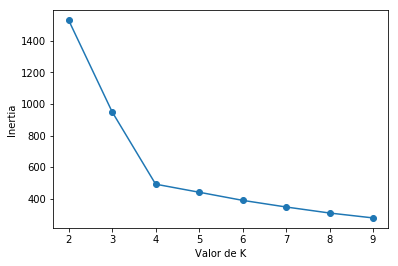

In [6]:
# Inertia = Soma das distâncias das amostras para o seu centro de agrupamento mais próximo.
Ks = range(2, 10)
Ds = []
for K in Ks:
    cls = KMeans(n_clusters = K, random_state = 101)
    cls.fit(X)
    Ds.append(cls.inertia_)

plt.plot(Ks, Ds, 'o-')
plt.xlabel("Valor de K")
plt.ylabel("Inertia")
plt.show()

## Agrupando Clientes por Consumo de Energia

https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption

In [12]:
# Carregando os dados
data = pd.read_csv('household_power_consumption.txt', delimiter = ';', low_memory = False)

In [13]:
# Remove os registros com valores NA
power_consumption = data.iloc[0:, 2:9].dropna()

In [14]:
power_consumption.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [22]:
# Obtém os atributos e separa em datasets de treino e de teste
pc_toarray = power_consumption.values
df_treino, df_teste = train_test_split(pc_toarray, train_size = .01)

In [26]:
# Aplica redução de dimensionalidade
hpc = PCA(n_components = 2).fit_transform(df_treino)

In [27]:
hpc

array([[11.00140982, -4.46609386],
       [-7.05201672, -0.31154539],
       [-7.56531812,  0.75911758],
       ...,
       [14.11720225, -2.41368229],
       [-7.67380789,  0.25571739],
       [10.33907025, -5.87503061]])

In [24]:
# Construção do modelo
k_means = KMeans()
k_means.fit(hpc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [25]:
# Obtém os valores mínimos e máximos e organiza o shape
x_min, x_max = hpc[:, 0].min() - 5, hpc[:, 0].max() - 1
y_min, y_max = hpc[:, 1].min(), hpc[:, 1].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
Z = k_means.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

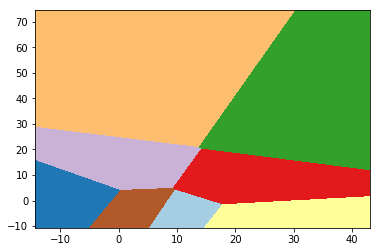

In [14]:
# Plot das áreas dos clusters
plt.figure(1)
plt.clf()
plt.imshow(Z, 
           interpolation = 'nearest', 
           extent = (xx.min(), xx.max(), yy.min(), yy.max()), 
           cmap = plt.cm.Paired, 
           aspect = 'auto', 
           origin = 'lower')

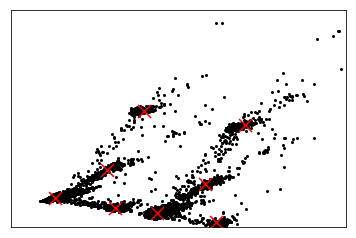

In [15]:
# Plot dos centróides de cada cluster
plt.plot(hpc[:, 0], hpc[:, 1], 'k.', markersize = 4)
centroids = k_means.cluster_centers_
inert = k_means.inertia_
plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'x', s = 169, linewidths = 3, color = 'r', zorder = 8)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [16]:
# Determinando um range de K
k_range = range(1,14)

In [17]:
# Aplicando o modelo K-Means a cada valor de K
k_means_var = [KMeans(n_clusters = k).fit(hpc) for k in k_range]

In [18]:
# Ajustando o centróide do cluster para cada modelo
centroids = [X.cluster_centers_ for X in k_means_var]

In [19]:
# Calculando a distância euclidiana de cada ponto de dado para o centróide
k_euclid = [cdist(hpc, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke,axis=1) for ke in k_euclid]

In [20]:
# Soma dos quadrados das distâncias dentro do cluster
wcss = [sum(d**2) for d in dist]

In [21]:
# Soma total dos quadrados
tss = sum(pdist(hpc)**2)/hpc.shape[0]

In [22]:
# Soma dos quadrados entre clusters
bss = tss - wcss

Text(0.5,1,'Variância Explicada x Valor de K')

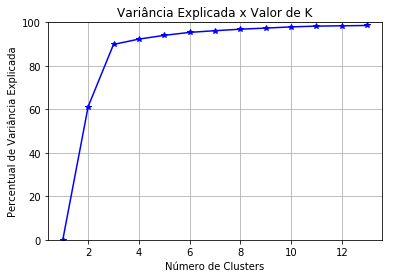

In [23]:
# Curva de Elbow
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, bss/tss*100, 'b*-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Número de Clusters')
plt.ylabel('Percentual de Variância Explicada')
plt.title('Variância Explicada x Valor de K')

In [24]:
# Criando um novo modelo
k_means = KMeans(n_clusters = 7)
k_means.fit(hpc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [25]:
# Obtém os valores mínimos e máximos e organiza o shape
x_min, x_max = hpc[:, 0].min() - 5, hpc[:, 0].max() - 1
y_min, y_max = hpc[:, 1].min() + 1, hpc[:, 1].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
Z = k_means.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

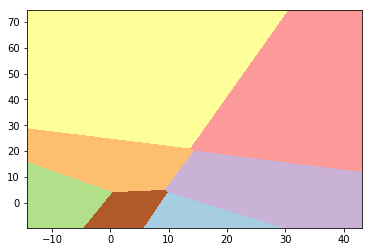

In [26]:
# Plot das áreas dos clusters
plt.figure(1)
plt.clf()
plt.imshow(Z, 
           interpolation = 'nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Paired,
           aspect = 'auto', 
           origin = 'lower')

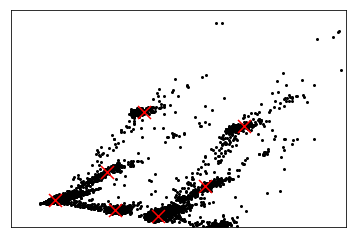

In [27]:
# Plot dos centróides
plt.plot(hpc[:, 0], hpc[:, 1], 'k.', markersize = 4)
centroids = k_means.cluster_centers_
inert = k_means.inertia_
plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'x', s = 169, linewidths = 3, color = 'r', zorder = 8)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [28]:
?silhouette_score

In [29]:
# Silhouette Score
labels = k_means.labels_
silhouette_score(hpc, labels, metric = 'euclidean')

0.8024001151440022

# Identificando os Clusters

Na aprendizagem supervisionada, os dados não possuem um label e cabe ao algoritmo descrobrir automaticamente como os dados se agrupam. Isso é feito pelas medidas de distância dos pontos de dados para os centróides. Não há uma classificação final e cabe a você definir o que cada cluster representa, a partir da observação do resultado do algoritmo. Abaixo um exemplo de código sobre como realizar essa classificação a partir da saída do algoritmo.

In [30]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pylab as pl

In [31]:
# Carregando o dataset e reduzindo a dimensionalidade
iris = load_iris()
pca = PCA(n_components = 2).fit(iris.data)
pca_2d = pca.transform(iris.data)

In [32]:
# Criando o modelo
kmeans = KMeans(n_clusters = 3, random_state = 111)
kmeans.fit(iris.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=111, tol=0.0001, verbose=0)

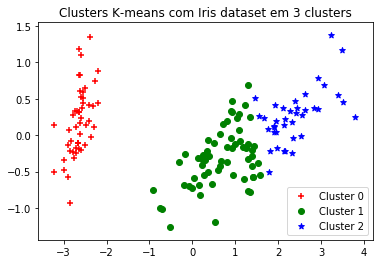

In [33]:
# Gerando "labels" para os resultados dos clusters
for i in range(0, pca_2d.shape[0]):
    if kmeans.labels_[i] == 1:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='+')
    elif kmeans.labels_[i] == 0:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')
    elif kmeans.labels_[i] == 2:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b', marker='*')
        pl.legend([c1, c2, c3],['Cluster 0', 'Cluster 1', 'Cluster 2'])
        pl.title('Clusters K-means com Iris dataset em 3 clusters')
pl.show()

### Fim

### Obrigado - Data Science Academy - <a href="http://facebook.com/dsacademybr">facebook.com/dsacademybr</a>